<a href="https://colab.research.google.com/github/Rafat97/DataThrone-ML/blob/main/DataThrone_dataset_001_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Dataset


*   First we download  the dataset from drive  
*   Then we unzip the file



### Download dataset from google drive

In [ ]:
!gdown --id 1-5pUsXCTOZB9ZUIdrko9Wp-41vVhR2Zq

Downloading...
From: https://drive.google.com/uc?id=1-5pUsXCTOZB9ZUIdrko9Wp-41vVhR2Zq
To: /content/DataThrone.zip
100% 135k/135k [00:00<00:00, 52.7MB/s]


### Unzip file

In [ ]:
!unzip -u './DataThrone.zip' -d './dataset'

Archive:  ./DataThrone.zip


# Importing All The packages

We used the below mentioned packages -

*   Pandas
*   numpy
*   Ipython
*   seaborn
*   Sklearn
*   Matplotlib
*   Xgboost





In [ ]:
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from IPython.display import display, HTML
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor,LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB

# Loading Data


*   First we defined the path
*   Then we read the csv file with pandas dataframe



In [ ]:
DATA_PATH = './dataset/insight_001.csv'

In [ ]:
df = pd.read_csv(DATA_PATH) #load dataset 
df = df.drop([0])   # drop 0 row

# Data Processing & Cleaning

*   At first, we do column striping
*   Then we replace the white spaces  with underscore 

### Columns text cleaning & striping







In [ ]:
df.columns = df.columns.str.strip() # columns strip
df.columns = df.columns.str.replace(' ', '_') # replace white space with underscore
df.columns 

Index(['Date', 'Lifetime_Total_Likes', 'Daily_New_Likes', 'Daily_Unlikes',
       'Daily_Page_Engaged_Users', 'Weekly_Page_Engaged_Users',
       '28_Days_Page_Engaged_Users', 'Daily_Total_Reach', 'Weekly_Total_Reach',
       '28_Days_Total_Reach',
       ...
       'Weekly_Total_web_site_click_count_per_Page_by_age_and_gender_-_55-64.U',
       'Weekly_Total_web_site_click_count_per_Page_by_age_and_gender_-_65+.F',
       'Weekly_Total_web_site_click_count_per_Page_by_age_and_gender_-_65+.M',
       'Weekly_Total_web_site_click_count_per_Page_by_age_and_gender_-_65+.U',
       'Weekly_Total_web_site_click_count_per_Page_by_age_and_gender_-_&lt;13.F',
       'Weekly_Total_web_site_click_count_per_Page_by_age_and_gender_-_&lt;13.M',
       'Weekly_Total_web_site_click_count_per_Page_by_age_and_gender_-_&lt;13.U',
       'Weekly_Total_web_site_click_count_per_Page_by_age_and_gender_-_UNKNOWN.F',
       'Weekly_Total_web_site_click_count_per_Page_by_age_and_gender_-_UNKNOWN.M',
       'We

### Dropping columns 

### Dropping the columns who have no values

In [ ]:
DROPED_COLOUMN=[]

for col in df.columns:
  siz = df[col].value_counts()
  if len(siz) <= 0:
    DROPED_COLOUMN.append(col)
    
print("Drop Column where value_counts is zero : ",len(DROPED_COLOUMN))
df.drop(DROPED_COLOUMN, axis = 1, inplace = True) 

Drop Column where value_counts is zero :  38


**Checking if the columns are dropped or not**

In [ ]:
df

Date  ... Weekly_Total_web_site_click_count_per_Page_by_age_and_gender_-_UNKNOWN.U
1    2/7/2021  ...                                                0.0                      
2    2/8/2021  ...                                                0.0                      
3    2/9/2021  ...                                                0.0                      
4   2/10/2021  ...                                                0.0                      
5   2/11/2021  ...                                                0.0                      
6   2/12/2021  ...                                                0.0                      
7   2/13/2021  ...                                                0.0                      
8   2/14/2021  ...                                                0.0                      
9   2/15/2021  ...                                                0.0                      
10  2/16/2021  ...                                                0.0                      
11  2/17/2021  ...                                                0.0                      
12  2/18/2021  ...                                                0.0                      
13  2/19/2021  ...                                                0.0                      
14  2/20/2021  ...                                                0.0                      
15  2/21/2021  ...                                                0.0                      
16  2/22/2021  ...                                                0.0                      
17  2/23/2021  ...                                                0.0                      
18  2/24/2021  ...                                                0.0                      
19  2/25/2021  ...                                                0.0                      
20  2/26/2021  ...                                                0.0                      
21  2/27/2021  ...                                                0.0                      
22  2/28/2021  ...                                                0.0                      
23   3/1/2021  ...                                                0.0                      
24   3/2/2021  ...                                                0.0                      
25   3/3/2021  ...                                                0.0                      
26   3/4/2021  ...                                                0.0                      
27   3/5/2021  ...                                                0.0                      
28   3/6/2021  ...                                                0.0                      

[28 rows x 1188 columns]

### Dropping the spatial column

In [ ]:
DROPED_COLOUMN_SPATIAL=[
    "Date"                  
]
date_coloumn_value = df['Date']
df.drop(DROPED_COLOUMN_SPATIAL, axis = 1, inplace = True) 

### Converting all the data types to float

In [ ]:
df = df.astype('float64') # convert all in float types

### Dropping the columns who have only  `0` values

In [ ]:
DROPED_COLOUMN_ONLY_HAVE_ZERO=[]
for col in df.columns:
  siz = df[col].unique()
  if siz[0] == 0 and len(siz) <= 1:
    DROPED_COLOUMN_ONLY_HAVE_ZERO.append(col)
    
print("Drop Column where value is zero only : ",len(DROPED_COLOUMN_ONLY_HAVE_ZERO))
df.drop(DROPED_COLOUMN_ONLY_HAVE_ZERO, axis = 1, inplace = True) 

Drop Column where value is zero only :  253


In [ ]:
df

Lifetime_Total_Likes  ...  Weekly_Total_get_direction_click_count_per_Page_by_age_and_gender_-_65+.M
1                 9239.0  ...                                                0.0                        
2                 9241.0  ...                                                0.0                        
3                 9241.0  ...                                                0.0                        
4                 9243.0  ...                                                0.0                        
5                 9242.0  ...                                                0.0                        
6                 9249.0  ...                                                0.0                        
7                 9250.0  ...                                                0.0                        
8                 9253.0  ...                                                0.0                        
9                 9257.0  ...                                                0.0                        
10                9260.0  ...                                                0.0                        
11                9260.0  ...                                                0.0                        
12                9264.0  ...                                                0.0                        
13                9269.0  ...                                                0.0                        
14                9271.0  ...                                                0.0                        
15                9278.0  ...                                                0.0                        
16                9281.0  ...                                                0.0                        
17                9288.0  ...                                                0.0                        
18                9290.0  ...                                                0.0                        
19                9292.0  ...                                                0.0                        
20                9293.0  ...                                                0.0                        
21                9294.0  ...                                                0.0                        
22                9297.0  ...                                                0.0                        
23                9300.0  ...                                                1.0                        
24                9308.0  ...                                                1.0                        
25                9312.0  ...                                                1.0                        
26                9318.0  ...                                                1.0                        
27                9325.0  ...                                                1.0                        
28                9343.0  ...                                                1.0                        

[28 rows x 934 columns]

### Current State of Data

After cleaning the data we are checking the current state of the data based on - 


*   Column Name
*   Number of Null Values
*   Number of Non Null Values
*   Unique
*   Data Type


In [ ]:
output = []

for col in df.columns:

    nonNull  = len(df) - np.sum(pd.isna(df[col]))
    numberVal = np.sum(pd.isna(df[col]))
    unique = df[col].nunique()
    colType = str(df[col].dtype)

    output.append([col, numberVal , nonNull, unique, colType])

output = pd.DataFrame(output)   
output.columns = ['colName','null-val','non-null values', 'unique', 'dtype']

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(output)


colName  null-val  \
0                                 Lifetime_Total_Likes         0   
1                                      Daily_New_Likes         2   
2                                        Daily_Unlikes        12   
3                             Daily_Page_Engaged_Users         0   
4                            Weekly_Page_Engaged_Users         0   
5                           28_Days_Page_Engaged_Users         0   
6                                    Daily_Total_Reach         0   
7                                   Weekly_Total_Reach         0   
8                                  28_Days_Total_Reach         0   
9                                  Daily_Organic_Reach         0   
10                                Weekly_Organic_Reach         0   
11                               28_Days_Organic_Reach         0   
12                                   Daily_Viral_Reach         0   
13                                  Weekly_Viral_Reach         0   
14                                 28_Days_Viral_Reach         0   
15                             Daily_Total_Impressions         0   
16                            Weekly_Total_Impressions         0   
17                           28_Days_Total_Impressions         0   
18                           Daily_Organic_impressions         0   
19                          Weekly_Organic_impressions         0   
20                         28_Days_Organic_impressions         0   
21                             Daily_Viral_impressions         0   
22                            Weekly_Viral_impressions         0   
23                           28_Days_Viral_impressions         0   
24                          Daily_Logged-in_Page_Views         6   
25                         Weekly_Logged-in_Page_Views         6   
26                        Daily_Logged-in_Page_Views.1         6   
27                       Weekly_Logged-in_Page_Views.1         6   
28                           Daily_Reach_Of_Page_Posts         0   
29                          Weekly_Reach_Of_Page_Posts         0   
30                         28_Days_Reach_Of_Page_Posts         0   
31                   Daily_Organic_Reach_of_Page_posts         0   
32                  Weekly_Organic_Reach_of_Page_posts         0   
33                 28_Days_Organic_Reach_of_Page_posts         0   
34                     Daily_Viral_Reach_Of_Page_Posts         0   
35                    Weekly_Viral_Reach_Of_Page_Posts         0   
36                   28_Days_Viral_Reach_Of_Page_Posts         0   
37               Daily_Total_Impressions_of_your_posts         0   
38              Weekly_Total_Impressions_of_your_posts         0   
39             28_Days_Total_Impressions_of_your_posts         0   
40             Daily_Organic_impressions_of_your_posts         0   
41            Weekly_Organic_impressions_of_your_posts         0   
42           28_Days_Organic_impressions_of_your_posts         0   
43               Daily_Viral_Impressions_Of_Your_Posts         0   
44              Weekly_Viral_Impressions_Of_Your_Posts         0   
45             28_Days_Viral_Impressions_Of_Your_Posts         0   
46                               Daily_Total_Consumers         0   
47                              Weekly_Total_Consumers         0   
48                             28_Days_Total_Consumers         0   
49                             Daily_Page_Consumptions         0   
50                            Weekly_Page_Consumptions         0   
51                           28_Days_Page_Consumptions         0   
52                             Daily_Negative_Feedback        27   
53                            Weekly_Negative_Feedback        15   
54                           28_Days_Negative_Feedback         0   
55                  Daily_Negative_Feedback_From_Users        27   
56                 Weekly_Negative_Feedback_From_Users        15   
57                28_Days_Negative_Feedback_From_Users         0   
58                           Daily_

We are printing the unique values and the count of those values

In [ ]:
print("-"*100)
for col in df.columns:
  print(df[col].value_counts())
  print("-"*100)

Streaming output truncated to the last 5000 lines.
7.0    8
Name: Lifetime_Likes_by_City_-_Bandarban,_Chittagong_Division,_Bangladesh, dtype: int64
----------------------------------------------------------------------------------------------------
51.0    6
47.0    4
50.0    4
52.0    4
49.0    3
53.0    2
48.0    1
Name: Lifetime_Likes_by_City_-_Barisal,_Barisal_Division,_Bangladesh, dtype: int64
----------------------------------------------------------------------------------------------------
43.0    6
42.0    4
44.0    4
36.0    3
38.0    3
41.0    2
40.0    1
45.0    1
Name: Lifetime_Likes_by_City_-_Bogura,_Rajshahi_Division,_Bangladesh, dtype: int64
----------------------------------------------------------------------------------------------------
9.0     7
14.0    6
11.0    5
12.0    4
13.0    2
Name: Lifetime_Likes_by_City_-_Brahmanbaria,_Chittagong_Division,_Bangladesh, dtype: int64
--------------------------------------------------------------------------------------------

### Printing the columns who have `null` values and `non null` values separately

In [ ]:
df_have_atleast_one_null = pd.DataFrame(df)
df_have_no_null_value = pd.DataFrame()
for col in df.columns:
  nullval = np.sum(pd.isnull(df[col]))
  if nullval == 0:
    df_have_atleast_one_null = df_have_atleast_one_null.drop(col,axis=1)
    df_have_no_null_value[col] = df[col]

display(df_have_no_null_value)
display(df_have_atleast_one_null)

Lifetime_Total_Likes  ...  Weekly_Total_get_direction_click_count_per_Page_by_age_and_gender_-_65+.M
1                 9239.0  ...                                                0.0                        
2                 9241.0  ...                                                0.0                        
3                 9241.0  ...                                                0.0                        
4                 9243.0  ...                                                0.0                        
5                 9242.0  ...                                                0.0                        
6                 9249.0  ...                                                0.0                        
7                 9250.0  ...                                                0.0                        
8                 9253.0  ...                                                0.0                        
9                 9257.0  ...                                                0.0                        
10                9260.0  ...                                                0.0                        
11                9260.0  ...                                                0.0                        
12                9264.0  ...                                                0.0                        
13                9269.0  ...                                                0.0                        
14                9271.0  ...                                                0.0                        
15                9278.0  ...                                                0.0                        
16                9281.0  ...                                                0.0                        
17                9288.0  ...                                                0.0                        
18                9290.0  ...                                                0.0                        
19                9292.0  ...                                                0.0                        
20                9293.0  ...                                                0.0                        
21                9294.0  ...                                                0.0                        
22                9297.0  ...                                                0.0                        
23                9300.0  ...                                                1.0                        
24                9308.0  ...                                                1.0                        
25                9312.0  ...                                                1.0                        
26                9318.0  ...                                                1.0                        
27                9325.0  ...                                                1.0                        
28                9343.0  ...                                                1.0                        

[28 rows x 149 columns]

Daily_New_Likes  ...  Daily_Liked_and_Online_-_23
1               3.0  ...                       5142.0
2               3.0  ...                       5071.0
3               1.0  ...                       5181.0
4               3.0  ...                       5082.0
5               NaN  ...                       4617.0
6               7.0  ...                       5127.0
7               1.0  ...                       5555.0
8               4.0  ...                       5631.0
9               5.0  ...                       5462.0
10              3.0  ...                       5517.0
11              2.0  ...                       5447.0
12              8.0  ...                       4995.0
13              6.0  ...                       5252.0
14              1.0  ...                       5453.0
15              7.0  ...                       5577.0
16              4.0  ...                       5754.0
17              7.0  ...                       5754.0
18              4.0  ...                       5723.0
19              2.0  ...                       5147.0
20              2.0  ...                       5407.0
21              2.0  ...                       5647.0
22              3.0  ...                       5699.0
23              4.0  ...                       5630.0
24              9.0  ...                       5648.0
25              6.0  ...                       5618.0
26              7.0  ...                       5131.0
27              7.0  ...                          NaN
28              NaN  ...                          NaN

[28 rows x 785 columns]

# Data Analysis

###Performing analysis with all the data (without changing the `null` values in data) 

In [ ]:
df.head(10) # visualizer get first 10 data

Lifetime_Total_Likes  ...  Weekly_Total_get_direction_click_count_per_Page_by_age_and_gender_-_65+.M
1                 9239.0  ...                                                0.0                        
2                 9241.0  ...                                                0.0                        
3                 9241.0  ...                                                0.0                        
4                 9243.0  ...                                                0.0                        
5                 9242.0  ...                                                0.0                        
6                 9249.0  ...                                                0.0                        
7                 9250.0  ...                                                0.0                        
8                 9253.0  ...                                                0.0                        
9                 9257.0  ...                                                0.0                        
10                9260.0  ...                                                0.0                        

[10 rows x 934 columns]

In [ ]:
df.tail(10)  # visualizer get last 10 data

Lifetime_Total_Likes  ...  Weekly_Total_get_direction_click_count_per_Page_by_age_and_gender_-_65+.M
19                9292.0  ...                                                0.0                        
20                9293.0  ...                                                0.0                        
21                9294.0  ...                                                0.0                        
22                9297.0  ...                                                0.0                        
23                9300.0  ...                                                1.0                        
24                9308.0  ...                                                1.0                        
25                9312.0  ...                                                1.0                        
26                9318.0  ...                                                1.0                        
27                9325.0  ...                                                1.0                        
28                9343.0  ...                                                1.0                        

[10 rows x 934 columns]

Printing a concise summary of the DataFrame

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 1 to 28
Data columns (total 934 columns):
 #   Column                                                                                                                                                                                    Dtype  
---  ------                                                                                                                                                                                    -----  
 0   Lifetime_Total_Likes                                                                                                                                                                      float64
 1   Daily_New_Likes                                                                                                                                                                           float64
 2   Daily_Unlikes                                                                                  

In [ ]:
df.describe() # describe dataset

Lifetime_Total_Likes  ...  Weekly_Total_get_direction_click_count_per_Page_by_age_and_gender_-_65+.M
count             28.000000  ...                                          28.000000                        
mean            9277.071429  ...                                           0.214286                        
std               28.729812  ...                                           0.417855                        
min             9239.000000  ...                                           0.000000                        
25%             9252.250000  ...                                           0.000000                        
50%             9274.500000  ...                                           0.000000                        
75%             9294.750000  ...                                           0.000000                        
max             9343.000000  ...                                           1.000000                        

[8 rows x 934 columns]

Finding the co-relation between the columns

In [ ]:
df.corr()

Lifetime_Total_Likes  ...  Weekly_Total_get_direction_click_count_per_Page_by_age_and_gender_-_65+.M
Lifetime_Total_Likes                                            1.000000  ...                                           0.751456                        
Daily_New_Likes                                                 0.400168  ...                                           0.488173                        
Daily_Unlikes                                                  -0.097304  ...                                          -0.149071                        
Daily_Page_Engaged_Users                                        0.428576  ...                                           0.553846                        
Weekly_Page_Engaged_Users                                       0.374213  ...                                           0.512281                        
...                                                                  ...  ...                                                ...                        
Daily_Liked_and_Online_-_23                                     0.517359  ...                                           0.166584                        
Daily_Total_get_direction_click_count_per_Page_...              0.156408  ...                                           0.368514                        
Weekly_Total_get_direction_click_count_per_Page...              0.751456  ...                                           1.000000                        
Daily_Total_get_direction_click_count_per_Page_...              0.156408  ...                                           0.368514                        
Weekly_Total_get_direction_click_count_per_Page...              0.751456  ...                                           1.000000                        

[934 rows x 934 columns]

## `Lifetime_Total_Likes` pairwise correlation 



*   At first we are finding the `co-relation` of `Lifetime_Total_Likes` vs all the columns
*   Then we are plotting the `heatmap` & `lineplot`
*   Then we are finding the maximum co-relation with         `Lifetime_Total_Likes` & plotting it into graph



In [ ]:
corr = df.corr()
semi_df = pd.DataFrame(corr['Lifetime_Total_Likes'])

#### HeatMap Ploting

In [ ]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(50, 500))
    ax = sns.heatmap(semi_df,annot=True, linewidths=.5, cmap="hsv") 

plt.savefig("main_dataset_heatmap_plot(Lifetime_Total_Likes).png")

#### Lineplot Ploting

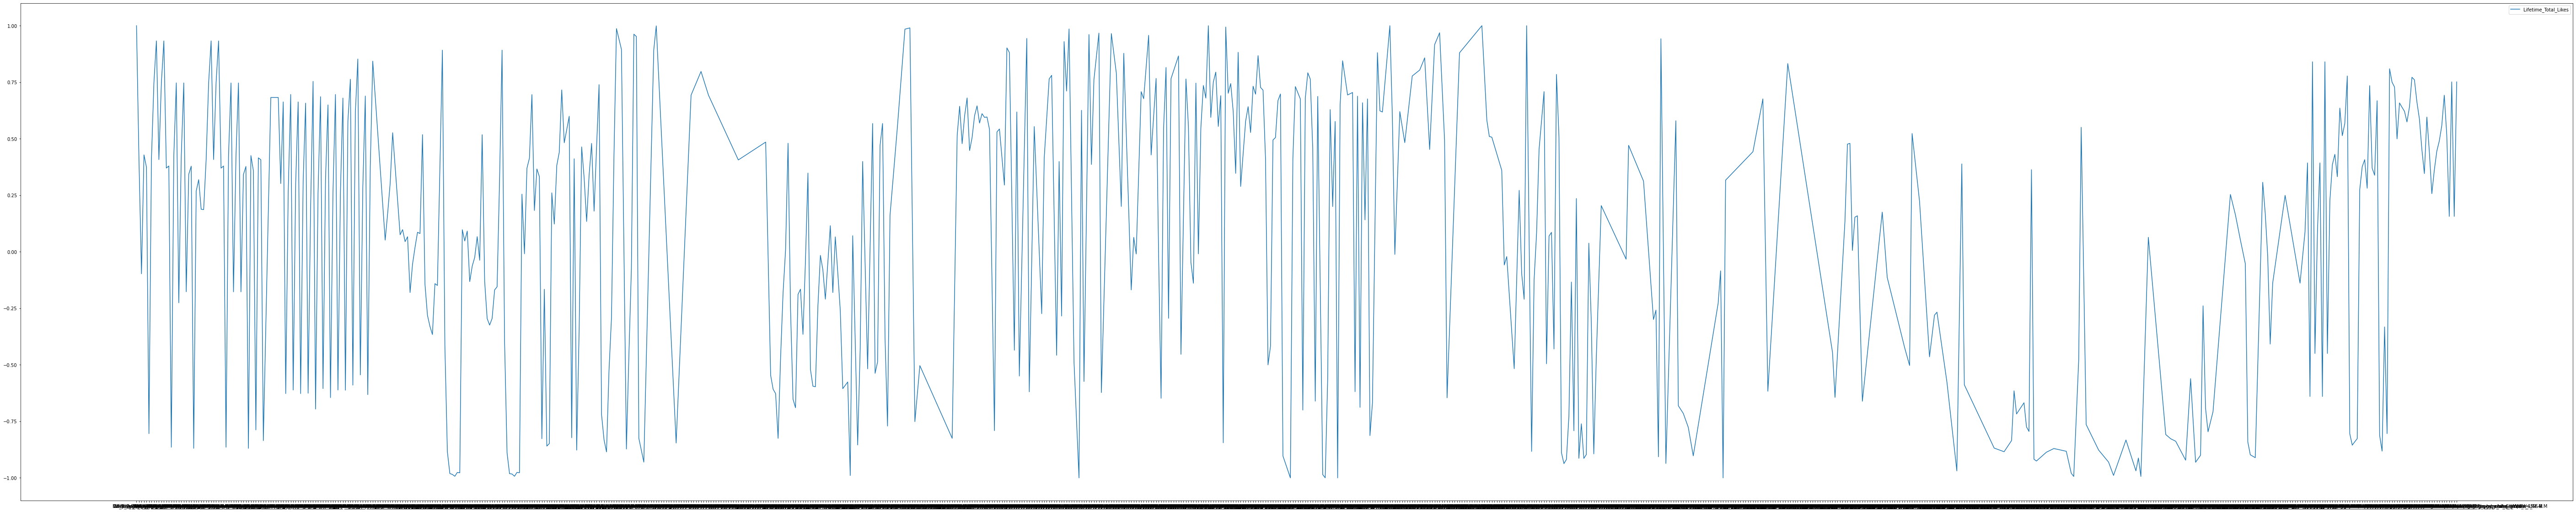

In [ ]:
f, ax = plt.subplots(figsize=(100, 20))
ax = sns.lineplot(data=semi_df)

#### Sorting based on the correlation. For finding maximum correlation with `Lifetime_Total_Likes`

In [ ]:
from google.colab import data_table

column_relation_with="Lifetime_Total_Likes"
column_relation_name = ""
column_relation_value = ""

sorted_data = semi_df.sort_values(by=[column_relation_with], ascending=False)
data_table.DataTable(sorted_data)


for index, row in sorted_data.iterrows():
    if row[column_relation_with] < 0.999999:
      column_relation_name = index
      column_relation_value = row[column_relation_with]
      break

print("-"*100)
print(column_relation_with+" :")
print("Maximum correlated column name =",column_relation_name)
print("Maximum correlated column value =", column_relation_value)
print("-"*100)

----------------------------------------------------------------------------------------------------
Lifetime_Total_Likes :
Maximum correlated column name = Lifetime_Likes_by_Country_-_BD
Maximum correlated column value = 0.9992520348257816
----------------------------------------------------------------------------------------------------


Plotting `Lifetime_Likes_by_Country_-_BD` vs `Lifetime_Total_Likes`

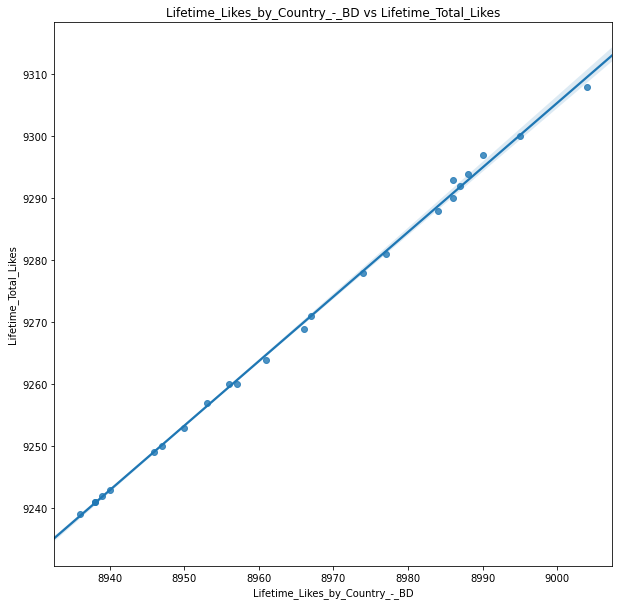

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
Label = column_relation_name+ " vs " +column_relation_with
scatterplot_data = sns.regplot(x="Lifetime_Likes_by_Country_-_BD", y="Lifetime_Total_Likes",truncate=False,
                data=df, ax=ax).set(title=Label)

##  Similarly we can find the correlation with other columns

In [ ]:
corr_df = df.corr()
relation_df = []

for col in corr.columns:
  semi_df = pd.DataFrame(corr[col])
  column_relation_with=col
  column_relation_name = ""
  column_relation_value = ""

  sorted_data = semi_df.sort_values(by=[column_relation_with], ascending=False)
  for index, row in sorted_data.iterrows():
    if row[column_relation_with] < 0.999999:
      column_relation_name = index
      column_relation_value = row[column_relation_with]
      break

  if type(column_relation_value) is not str :
    relation_df.append([column_relation_with, column_relation_name , column_relation_value])


relation_df = pd.DataFrame(relation_df)   
relation_df.columns = ['relation','relation-with','correlation-value']


display(relation_df)

relation  ... correlation-value
0                                 Lifetime_Total_Likes  ...          0.999252
1                                      Daily_New_Likes  ...          0.996599
2                                        Daily_Unlikes  ...          0.987878
3                             Daily_Page_Engaged_Users  ...          0.998821
4                            Weekly_Page_Engaged_Users  ...          0.999892
..                                                 ...  ...               ...
595                        Daily_Liked_and_Online_-_23  ...          0.921176
596  Daily_Total_get_direction_click_count_per_Page...  ...          0.691564
597  Weekly_Total_get_direction_click_count_per_Pag...  ...          0.995105
598  Daily_Total_get_direction_click_count_per_Page...  ...          0.691564
599  Weekly_Total_get_direction_click_count_per_Pag...  ...          0.995105

[600 rows x 3 columns]

In [ ]:
data_table.DataTable(relation_df)

# Summary
in this notebook we worked with the insight_001.csv dataset.This dataset consists the information of the overall reach and engagement of the page during different time period. 
This dataset consists of 28 rows and 1226 columns.This dataset is assymetric.That's why we had to perform lots of pre processing steps.For the analysis part we divided the whole procedure into 5 sections.

# Downloading Dataset :
we uploaded the given  dataset to google drive and zipped it to upload to google drive.Then we downloaded the file with gdown and then unzipped it.

#Importing All The Packages :

We used the python language and imported all the necessary packages   

#Loading Data :

We used the pandas library to load the data from the csv file.

#Data Processing and Cleaning : 

This is the most important step of our whole procedure.At first we fixed the columns such as the column names.Then we used the describe method to print information of the data.Then we dropped the column that we didn't need such as the columns which has only '0' values in them. 

#Data analysis:

To find the different kinds of relation in the data we determined the different co-relation values between the columns.Then we produced a heatmap from the co-relation values.then we selected the `Lifetime_Total_Likes` column and determined the pairwise co-relation of that column.Then we found out the column name which has the maximum co-relation value and then we plotted the data of both the columns. 

We showed the process for only one column.Similarly,we determined the maximum co-relations of the other columns.From this we can identify we can identify which columns are related.

In this way we completed our analysis.There are lots of possible cases.The steps that we performed in the above mentioned process are our hypothesis.



# <center>--- Thank You --</center>